In [2]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline

import matplotlib.patches as mpatches
import scipy.stats as stats


Welcome to JupyROOT 6.18/04


In [3]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

In [4]:
energy_array=np.arange(16.0,21.5,0.5)
# energy_array=[19.0]

nuAngles_32_tree
nuAngles_33_tree
nuAngles_34_tree
nuAngles_35_tree
nuAngles_36_tree
nuAngles_37_tree
nuAngles_38_tree
nuAngles_39_tree
nuAngles_40_tree
nuAngles_41_tree
nuAngles_42_tree


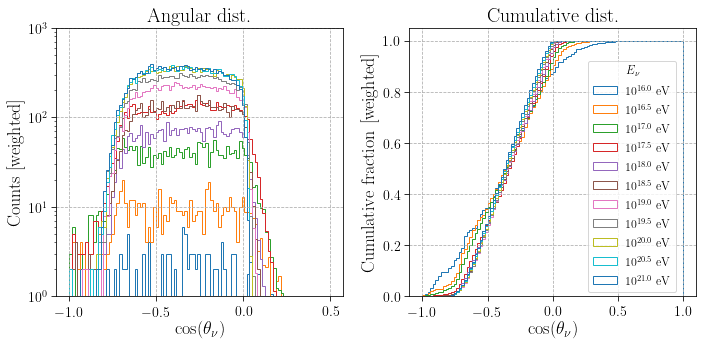

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for energy in energy_array:
    f = ROOT.TFile.Open("/users/PAS0654/osu8354/ARA_cvmfs/source/AraSim/outputs/nuAngles_%0.1f.root"%energy)
    tree = f.Get('nuAngles_%0.0f_tree'% int(energy*2))
    print('nuAngles_%0.0f_tree'%int(energy*2))

    test=[]
    ang_forHist=[]
    nuWeights=[]
#     ang_cutoff=[]
    
    for event in range(tree.GetEntries()):
        tree.GetEntry(event)
        ang_forHist.append(tree.costheta)
        test.append(tree.tanphi)
        nuWeights.append(tree.weight)

#         if (np.degrees(tree.theta-np.pi/2)<-25):
#             ang_cutoff.append(np.degrees(tree.theta-np.pi/2))
    # plt.hist(np.cos(ang_forHist), bins=1000, density=True);
    # plt.ylim(0,5)
#     numBins=int(tree.GetEntries()/60)
    numBins=100

    axes[0].hist(ang_forHist,weights=nuWeights, range=(-1, 0.5),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False);
    axes[1].hist(ang_forHist,weights=nuWeights, range=(-1, 1),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False,cumulative=True, density=True, label="$10^{%0.1f} $ eV" %energy);
#     axes[2].hist(ang_forHist,weights=nuWeights, range=(-1, 1),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False,cumulative=True, density=True, label="$10^{%0.1f} $ eV" %energy);

# axes[1].set_title("Histogram of $\cos(\\theta_{rec})$", fontsize=12)
# axes[0].axvline(-0.68, linestyle='--', color="green",label="Cen A position (zenith)",linewidth=2.8)
# axes[1].axvline(-0.68, linestyle='--', color="green",linewidth=2.8)
# axes[2].axvline(-0.68, linestyle='--', color="green",linewidth=2.8)


axes[0].set_xlabel("$\cos(\\theta_{\\nu})$")
axes[1].set_xlabel("$\cos(\\theta_{\\nu})$")
# axes[2].set_xlabel("$\cos(\\theta_{\\nu})$")

axes[0].set_ylabel("Counts [weighted]")
axes[1].set_ylabel("Cumulative fraction [weighted]")
# axes[2].set_ylabel("Cumulative fraction [weighted]")

axes[0].set_yscale("log")
axes[0].set_ylim(1E0, 1E3)
axes[0].grid(linestyle='--', linewidth=0.8)
axes[1].grid(linestyle='--', linewidth=0.8)
# axes[2].grid(linestyle='--', linewidth=0.8)

# axes[2].set_xlim(-1,0)
# axes[2].set_ylim(0,0.2)
axes[0].set_title("Angular dist.")
axes[1].set_title("Cumulative dist.")
# axes[2].set_title("Zoomed cumulative dist.")

fig.legend(ncol=1, loc=(0.83,0.16), title = "$E_\\nu$")

    # axes[1].set_yscale('log')
    # plt.legend()
# fig.suptitle("Angular reconstrucion of simulated events with AraSim")
fig.tight_layout()
fig.savefig("theta_nu_distro.pdf")

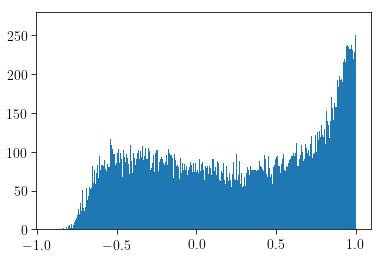

In [19]:
plt.hist(ang_forHist, bins=500);

In [3]:
np.arccos(-0.68)

2.3185589614548174